In [74]:
import numpy as np
import pandas as pd
import gradio as gr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,precision_recall_fscore_support, recall_score, precision_score, f1_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [75]:
data=pd.read_csv('Breast cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [77]:
data.drop(columns = ["id","Unnamed: 32"], inplace = True)

In [78]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [79]:
data.duplicated().sum()

0

In [80]:
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [81]:
labelencoder = LabelEncoder()
data['diagnosis'] = labelencoder.fit_transform(data['diagnosis'])
data.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


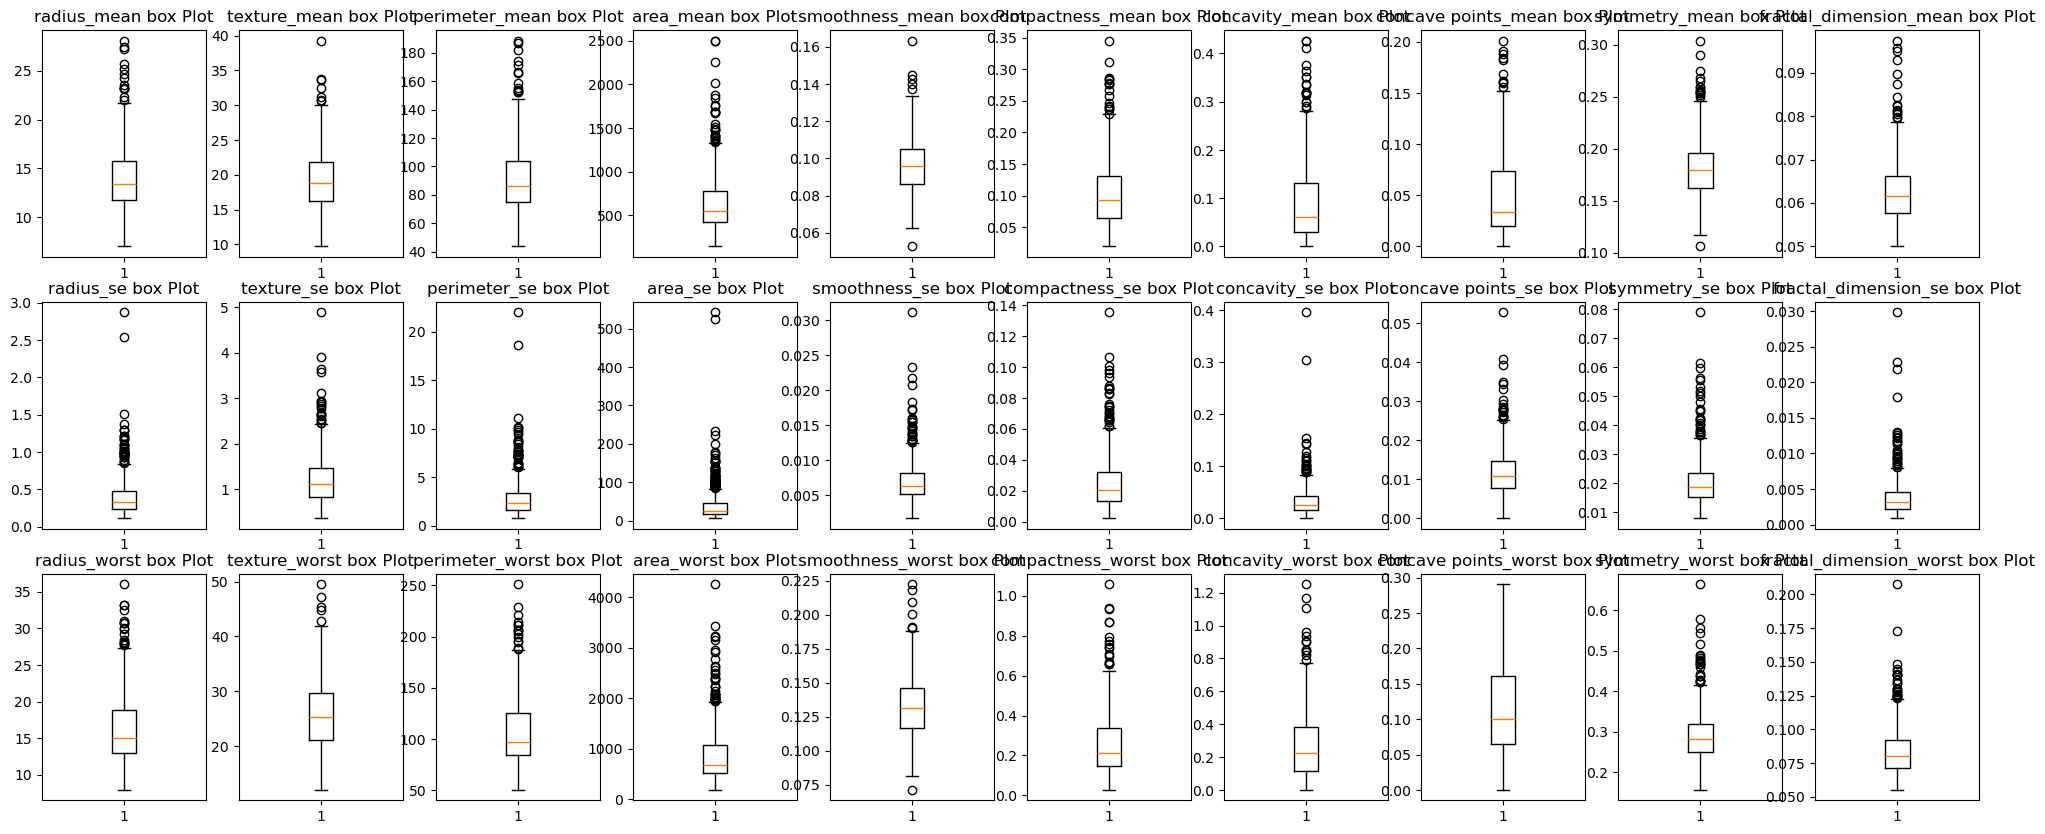

In [82]:
# plt.figure(figsize=(12, 8))
# data.boxplot(column=['radius_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'])
# plt.show()
numCols = data.select_dtypes('float64').columns
numCols
plt.figure(figsize=(25,10))
for i, col in enumerate(numCols):
    plt.subplot(3, 10, i+1)
    plt.boxplot(data[col])
    plt.title(f"{col} box Plot")

In [83]:
for col in numCols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    Lf = Q1 - 1.5 * IQR
    Up = Q3 + 1.5 * IQR

    # Cap values below the lower fence and above the upper fence
    data[col] = data[col].clip(lower=Lf, upper=Up)

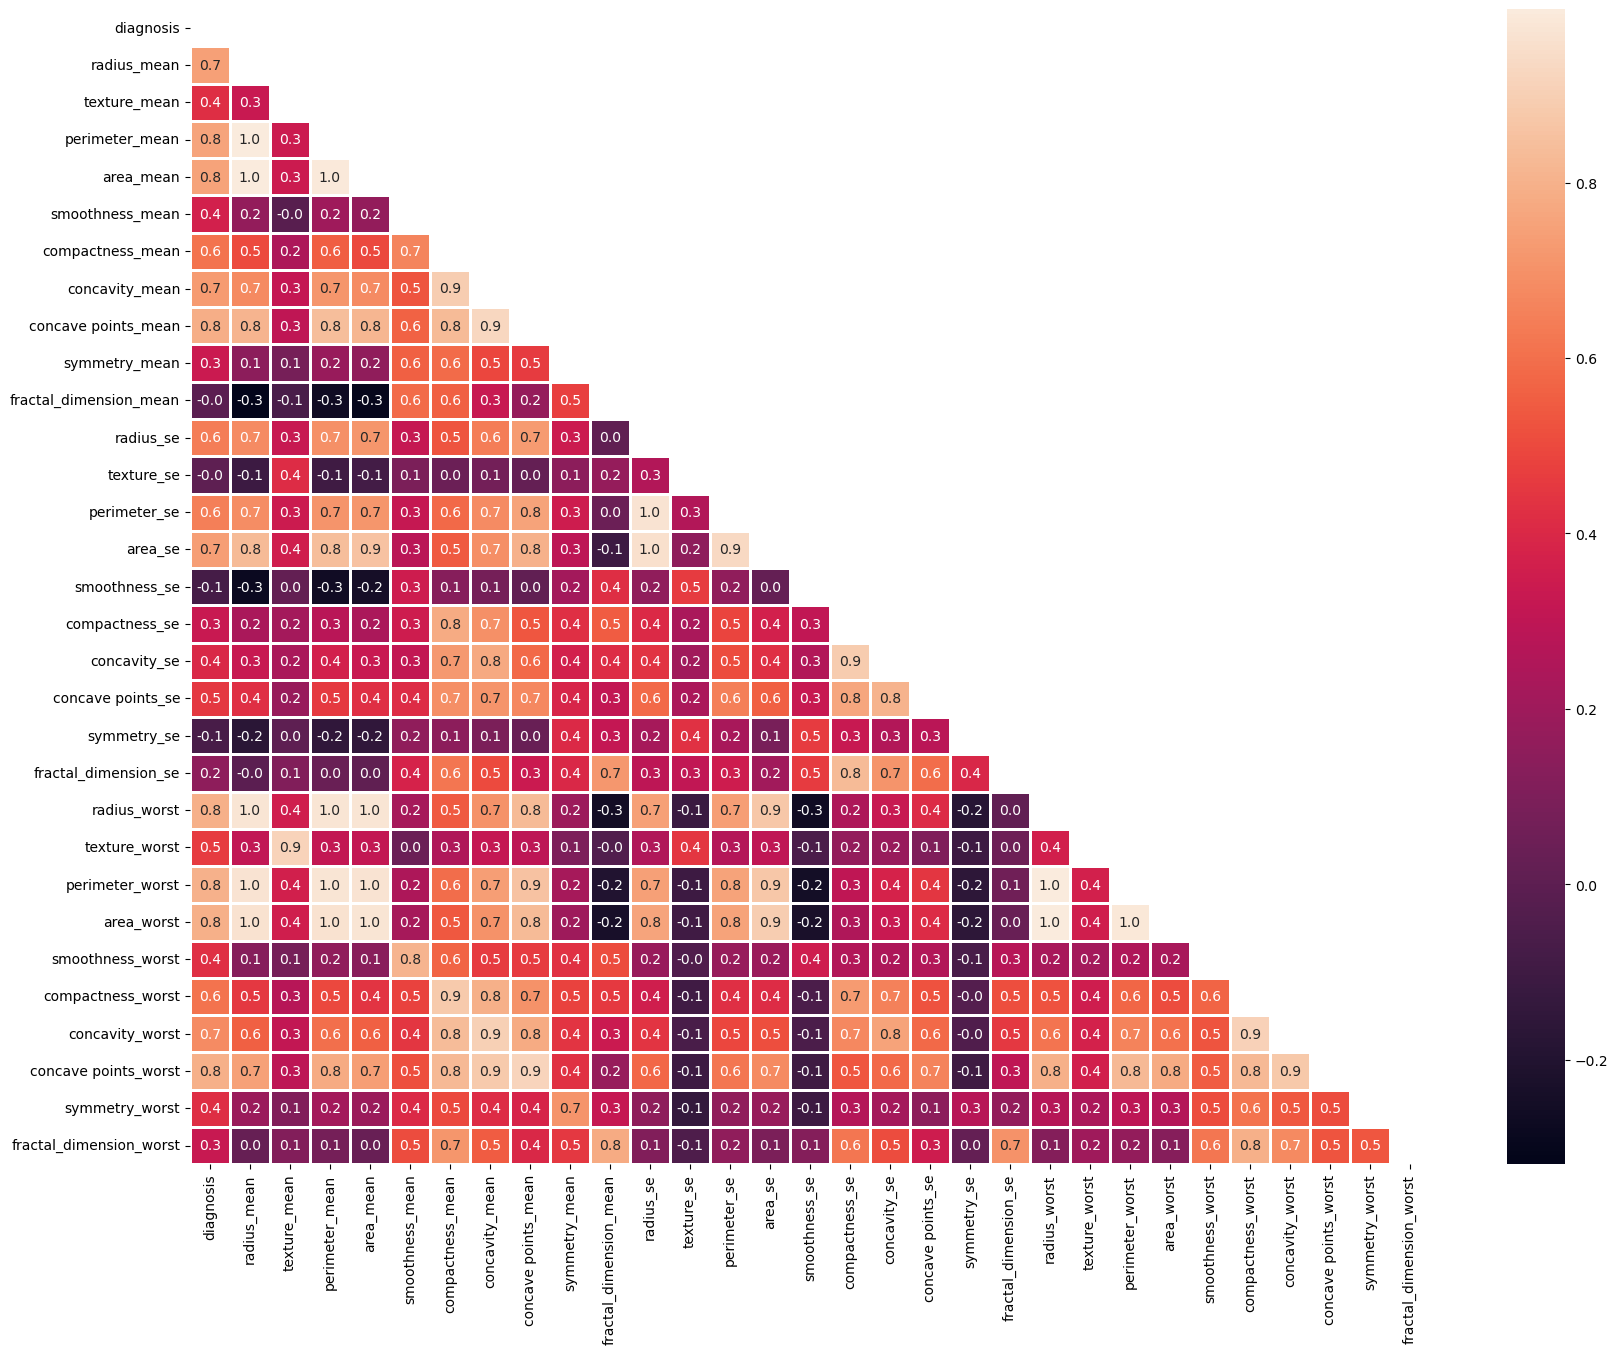

In [84]:
#heatmap
plt.figure(figsize=(20,15))
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask= mask, linewidths= 1, annot= True, fmt='.1f')
plt.show()

In [85]:
corr_matrix = data.corr().abs()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)
to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.90)]

data= data.drop(to_drop, axis=1)
data

,diagnosis,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.118400,0.22862,0.2419,0.07871,0.90530,86.20,0.006399,0.049040,0.05373,0.01587,0.03003,0.006193,17.33,1937.05,0.16220,0.7119,0.2654,0.41915,0.11890
1,1,0.084740,0.07864,0.1812,0.05667,0.73390,74.08,0.005225,0.013080,0.01860,0.01340,0.01389,0.003532,23.41,1937.05,0.12380,0.2416,0.1860,0.27500,0.08902
2,1,0.109600,0.15990,0.2069,0.05999,0.78690,86.20,0.006150,0.040060,0.03832,0.02058,0.02250,0.004571,25.53,1709.00,0.14440,0.4504,0.2430,0.36130,0.08758
3,1,0.133695,0.22862,0.2464,0.07875,1.15600,27.23,0.009110,0.061505,0.05661,0.01867,0.03596,0.008023,26.50,567.70,0.19010,0.6869,0.2575,0.41915,0.12301
4,1,0.100300,0.13280,0.1809,0.05883,0.78130,86.20,0.011490,0.024610,0.05688,0.01885,0.01756,0.005115,16.67,1575.00,0.13740,0.4000,0.1625,0.23640,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,0.111000,0.11590,0.1726,0.05623,1.25600,86.20,0.010300,0.028910,0.05198,0.02454,0.01114,0.004239,26.40,1937.05,0.14100,0.4107,0.2216,0.20600,0.07115
565,1,0.097800,0.10340,0.1752,0.05533,2.43415,86.20,0.005769,0.024230,0.03950,0.01678,0.01898,0.002498,38.25,1731.00,0.11660,0.3215,0.1628,0.25720,0.06637
566,1,0.084550,0.10230,0.1590,0.05648,1.07500,48.55,0.005903,0.037310,0.04730,0.01557,0.01318,0.003892,34.12,1124.00,0.11390,0.3403,0.1418,0.22180,0.07820
567,1,0.117800,0.22862,0.2397,0.07016,1.59500,86.20,0.006522,0.061505,0.07117,0.01664,0.02324,0.006185,39.42,1821.00,0.16500,0.7855,0.2650,0.40870,0.12301


In [86]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=10)  # Reduce to 10 features
# data_pca = pca.fit_transform(data_scaled)

In [87]:
# import seaborn as sns
# plt.figure(figsize=(10, 8))
# sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
# plt.show()

In [88]:
X = data.drop(columns=['diagnosis'])
y = data.diagnosis
X.shape, y.shape

((569, 19), (569,))

In [89]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled.shape, y_resampled.shape

((714, 19), (714,))

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [91]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((499, 19), (215, 19), (499,), (215,))

In [92]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [93]:
from sklearn import linear_model
lod_model = linear_model.LogisticRegression()
lod_model.fit(X_train, y_train)

LogisticRegression()

In [94]:
y_pred = lod_model.predict(X_test)

In [95]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy = {acc*100}% ")

Accuracy = 98.13953488372093% 


In [96]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

Accuracy: 0.9813953488372092
Confusion Matrix:
 [[112   1]
 [  3  99]]
Recall: 0.9705882352941176
Precision: 0.99
F1 Score: 0.9801980198019802


In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf_clf = RandomForestClassifier(n_estimators = 100)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
acc_RF=accuracy_score(y_test, y_pred_rf)
print('Accuracy:',acc_RF)

Accuracy: 0.9627906976744186


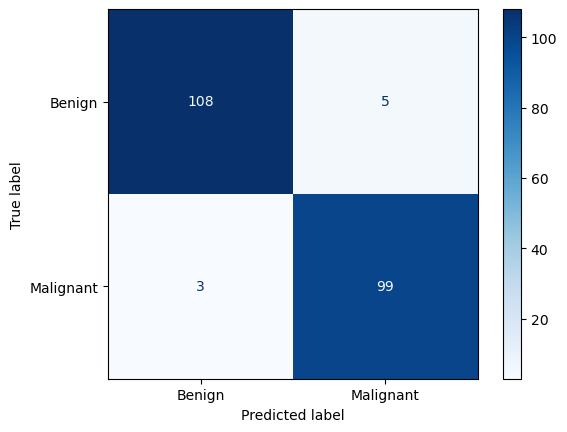

In [98]:
cm= confusion_matrix(y_test,y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [99]:
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       113
           1       0.95      0.97      0.96       102

    accuracy                           0.96       215
   macro avg       0.96      0.96      0.96       215
weighted avg       0.96      0.96      0.96       215



In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
model = KNeighborsClassifier()
def get_classification_report(X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    predpro=model.predict_proba(X_test)[:,1]
    fpr,tpr,thr=roc_curve(y_test,predpro)
    auc_score=roc_auc_score(y_test,predpro)

    return classification_report(y_test, pred),fpr,tpr,thr,auc_score

In [130]:
import joblib
joblib.dump(model, 'breast_cancer_model.pkl')

['breast_cancer_model.pkl']

In [101]:
cr,fpr,tpr,thr,auc_score= get_classification_report(X_train, y_train, X_test, y_test)

In [102]:
print(cr)
print(thr)
print(auc_score)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       113
           1       0.95      0.96      0.96       102

    accuracy                           0.96       215
   macro avg       0.96      0.96      0.96       215
weighted avg       0.96      0.96      0.96       215

[inf 1.  0.8 0.6 0.4 0.2 0. ]
0.9900659378795766


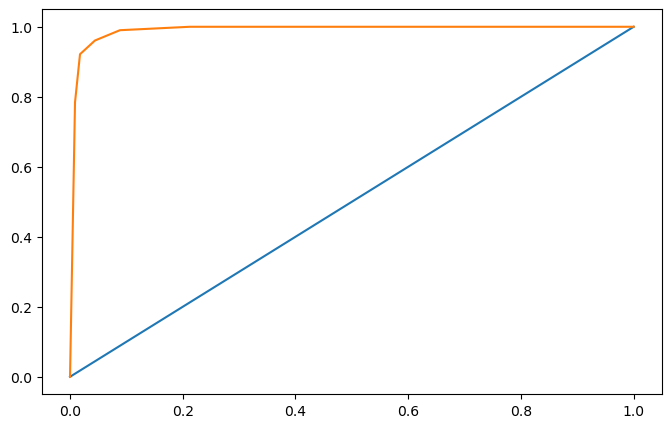

In [103]:
plt.figure(figsize=(8,5))
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.show()


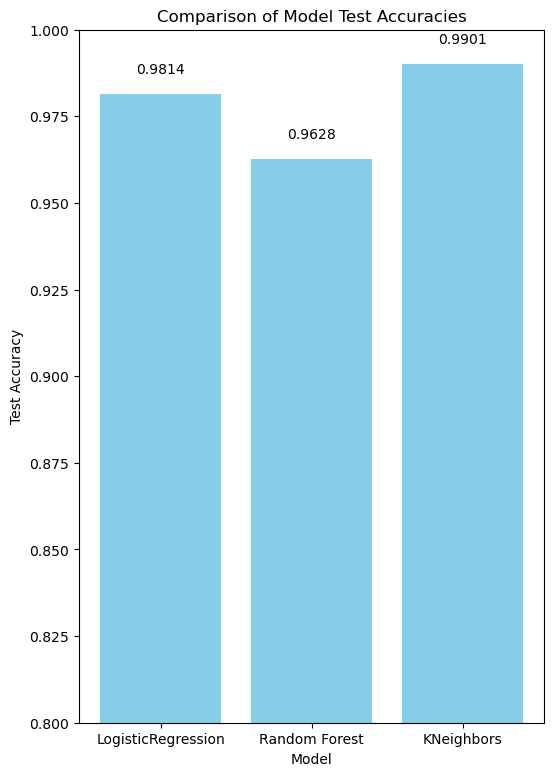

In [104]:
model_names = ['LogisticRegression', 'Random Forest', 'KNeighbors'] #'Neural Network'
accuracies = [acc , acc_RF,auc_score, ]

plt.figure(figsize=(6, 9))
plt.bar(model_names, accuracies, color='skyblue')
plt.title('Comparison of Model Test Accuracies')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.005, f'{accuracy:.4f}', ha='center', va='bottom')
plt.ylim(0.8, 1)
plt.show()

In [117]:
data.describe()

,diagnosis,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,0.096266,0.103222,0.180734,0.062604,1.198057,34.959487,0.006876,0.024561,0.030038,0.011601,0.020047,0.003591,25.648453,849.907821,0.132209,0.268754,0.114606,0.287616,0.083342
std,0.483918,0.013685,0.049386,0.026067,0.006418,0.485500,24.294515,0.002410,0.014947,0.020577,0.005486,0.006572,0.001780,6.054406,475.645240,0.022320,0.197461,0.065732,0.053868,0.015993
min,0.000000,0.057975,0.019380,0.111200,0.049960,0.360200,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,12.020000,185.200000,0.072500,0.000000,0.000000,0.156500,0.055040
25%,0.000000,0.086370,0.064920,0.161900,0.057700,0.833900,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,21.080000,515.300000,0.116600,0.114500,0.064930,0.250400,0.071460
50%,0.000000,0.095870,0.092630,0.179200,0.061540,1.108000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,25.410000,686.500000,0.131300,0.226700,0.099930,0.282200,0.080040
75%,1.000000,0.105300,0.130400,0.195700,0.066120,1.474000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,29.720000,1084.000000,0.146000,0.382900,0.161400,0.317900,0.092080
max,1.000000,0.133695,0.228620,0.246400,0.078750,2.434150,86.200000,0.012612,0.061505,0.082490,0.025318,0.035960,0.008023,42.680000,1937.050000,0.190100,0.785500,0.291000,0.419150,0.123010


In [129]:
# Define prediction function
def predict_diagnosis(smoothness_mean, compactness_mean, symmetry_mean, fractal_dimension_mean, texture_se, area_se, smoothness_se, compactness_se, concavity_se, concave_points_se, symmetry_se, fractal_dimension_se, texture_worst, area_worst, smoothness_worst, concavity_worst, concave_points_worst, symmetry_worst, fractal_dimension_worst):
    input_data = np.array([[smoothness_mean, compactness_mean, symmetry_mean, fractal_dimension_mean, texture_se, area_se, smoothness_se, compactness_se, concavity_se, concave_points_se, symmetry_se, fractal_dimension_se, texture_worst, area_worst, smoothness_worst, concavity_worst, concave_points_worst, symmetry_worst, fractal_dimension_worst]])
    input_data_scaled = scaler.transform(input_data)
    prediction = model.predict(input_data_scaled)
    return "Malignant" if prediction == 1 else "Benign"

# Create the Gradio interface
inputs = [
    gr.Slider(0.05, 0.14, label="Smoothness Mean"),
    gr.Slider(0.02, 0.23, label="Compactness Mean"),
    gr.Slider(0.11, 0.25, label="Symmetry Mean"),
    gr.Slider(0.05, 0.08, label="Fractal Dimension Mean"),
    gr.Slider(0.36, 2.43, label="Texture SE"),
    gr.Slider(6.8, 86.2, label="Area SE"),
    gr.Slider(0.0017, 0.013, label="Smoothness SE"),
    gr.Slider(0.002, 0.06, label="Compactness SE"),
    gr.Slider(0.0, 0.08, label="Concavity SE"),
    gr.Slider(0.0, 0.03, label="Concave Points SE"),
    gr.Slider(0.0078, 0.036, label="Symmetry SE"),
    gr.Slider(0.0009, 0.008, label="Fractal Dimension SE"),
    gr.Slider(12.02, 42.68, label="Texture Worst"),
    gr.Slider(185.2, 1937.05, label="Area Worst"),
    gr.Slider(0.0725, 0.19, label="Smoothness Worst"),
    gr.Slider(0.0, 0.79, label="Concavity Worst"),
    gr.Slider(0.0, 0.29, label="Concave Points Worst"),
    gr.Slider(0.15, 0.42, label="Symmetry Worst"),
    gr.Slider(0.05, 0.12, label="Fractal Dimension Worst")
]

gr.Interface(
    fn=predict_diagnosis, 
    inputs=inputs, 
    outputs="text", 
    title="Breast Cancer Diagnosis Predictor",
    description="This web app predicts whether the breast cancer is Benign or Malignant based on various features.",
    theme="default"  # You can also set the theme to "default", "compact", or "huggingface"
).launch()

* Running on local URL:  http://127.0.0.1:7866

To create a public link, set `share=True` in `launch()`.
